# Playground for Topic Modeling slides - Joe Biden Tweets
- Stephen W. Thomas
- Used for MMA 865; MMAI 891; Exec Ed

In [1]:
pip install unidecode

In [2]:
pip install pyLDAvis

In [3]:
pip install bertopic

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import datetime
print(datetime.datetime.now())

2022-03-01 15:21:41.933931


In [6]:
import warnings
warnings.filterwarnings("ignore", DeprecationWarning)
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unidecode

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in the Data

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/stepthom/NLP_course/main/data/JoeBidenTweets_small.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  799 non-null    object
 1   tweet      799 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


,timestamp,tweet
0,7/2/2020 22:23,This is a shameful move. Now is the time for e...
1,7/2/2020 4:45,I’ll read my daily briefings.
2,7/2/2020 4:00,Small businesses are the backbone of communiti...
3,7/1/2020 5:15,"On the final day of # PrideMonth, here’s my pr..."
4,6/30/2020 22:39,Tune in as I deliver remarks on how President ...


# Text Preprocessing

In [8]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['s', 'rt', 'br'])

lemmer = WordNetLemmatizer()

cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


c_re = re.compile('(%s)' % '|'.join(cList.keys()))


def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)


def preprocesser(doc):
    doc = doc.replace(u'’', u"'")
    doc = doc.replace(u'“', u'"')
    doc = doc.replace(u'”', u'"')
    
    # Remove HTML tags
    doc = BeautifulSoup(doc, "lxml").get_text()
    
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    
    # remove URLS like pic.twitter.com/SODA
    doc = re.sub(r'\b\S*(\.com|\.edu|\.net|\.gov|\.ca|\.org)(/\S*)?', '', doc)
    
    # Make strings like "@ DrJoe" become "@DrJoe"
    doc = re.sub(r'(\@)(\s+)(.)', r'\1\3', doc)
    
    # Make strings like "# DrJoe" become "#DrJoe"
    doc = re.sub(r'(#)(\s+)(.)', r'\1\3', doc)
    


    #spacy_doc = nlp(doc)
    #doc = " ".join([token.lemma_ for token in spacy_doc])
    
    #Lowercase
    doc = doc.lower()
    
    doc = expandContractions(doc)
    
    doc = ' '.join([w for w in doc.split() if w not in stop_words])
    
    doc = ' '.join([lemmer.lemmatize(w) for w in doc.split()])
    
    return doc

In [9]:
df['tweet_clean'] = df['tweet'].apply(preprocesser)

In [10]:
df

,timestamp,tweet,tweet_clean
0,7/2/2020 22:23,This is a shameful move. Now is the time for e...,shameful move. time employer empathy family ju...
1,7/2/2020 4:45,I’ll read my daily briefings.,read daily briefings.
2,7/2/2020 4:00,Small businesses are the backbone of communiti...,"small business backbone community nation, need..."
3,7/1/2020 5:15,"On the final day of # PrideMonth, here’s my pr...","final day #pridemonth, here's promise you: hon..."
4,6/30/2020 22:39,Tune in as I deliver remarks on how President ...,tune deliver remark president trump failed pro...
...,...,...,...
794,5/5/2012 6:42,VP Biden talked to the @ YWCAUSA today about t...,vp biden talked @ywcausa today importance reau...
795,4/27/2012 7:24,“The Violence Against Women Act is as importan...,"""the violence woman act important today been.""..."
796,4/19/2012 4:46,Watch Vice President Biden make the case for r...,watch vice president biden make case reauthori...
797,4/19/2012 2:48,RT @ VP: VP Biden: 'No woman should be victimi...,@vp: vp biden: 'no woman victimized purely phy...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We override the token_pattern in order to keep @signs and #hashtags
vectorizer = TfidfVectorizer(
    max_df=0.80, 
    min_df=0.01,
    token_pattern = '[a-zA-Z0-9@#]+',
    ngram_range=[1,3],
    stop_words=stop_words,
    preprocessor=preprocesser,
    max_features=1000)

vectorizer = vectorizer.fit(df['tweet'])
dtm = vectorizer.transform(df['tweet'])

feature_names = vectorizer.get_feature_names()

In [12]:
# Works for both LDA and NMF models.

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 9), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

## Topic Modeling with LDA

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=500, 
    learning_method='batch', 
    random_state=123,
    n_jobs=2,
    verbose=0,
    )
lda = lda.fit(dtm)

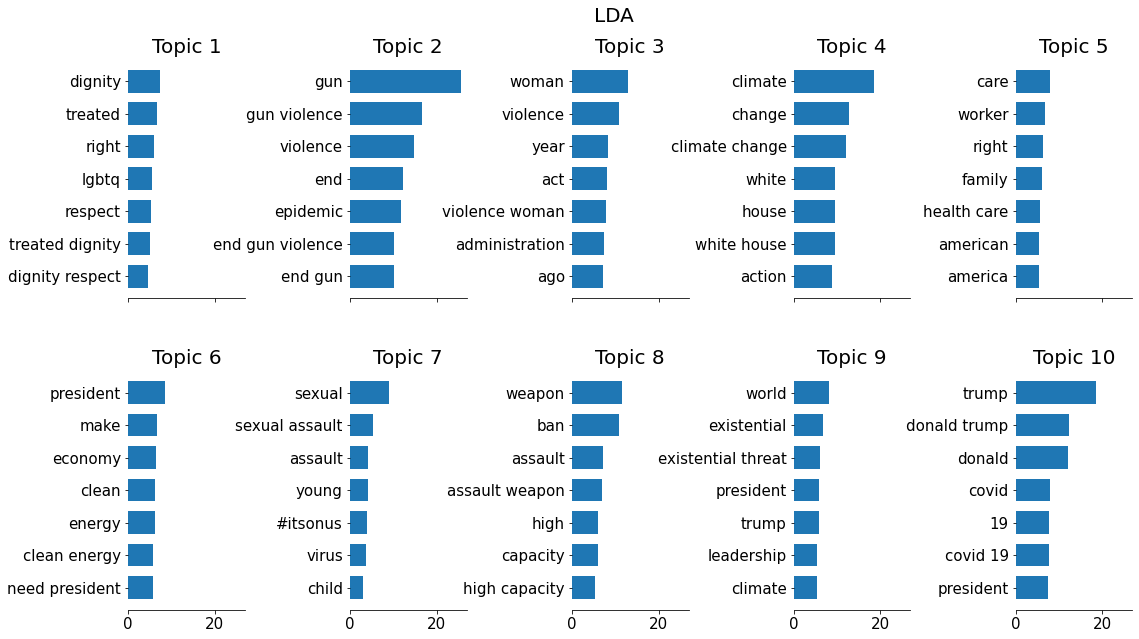

In [14]:
plot_top_words(lda, feature_names, 7, "LDA")

## Visualize Topics with LDAVis

In [15]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, dtm, vectorizer, mds="tsne")

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  15.056144
9       0.648955  71.707100       2        1  12.988236
8      71.019684   9.971006       3        1  12.544784
3       3.785981  33.185135       4        1  11.624844
2     -42.666500  -9.222070       5        1  10.165982
4      -3.621689 -43.526516       6        1  10.018153
5      -3.632402  -4.171708       7        1   9.299975
7     -36.584400  35.804413       8        1   6.785566
0      44.391380  50.615383       9        1   6.386692
6      40.235809 -31.591665      10        1   5.129624, topic_info=          Term       Freq      Total Category  logprob  loglift
192        gun  23.000000  23.000000  Default  30.0000  30.0000
454     weapon  11.000000  11.000000  Default  29.0000  29.0000
89     climate  22.000000  22.000000  Default  28.0000  28.0000
49         ban  11.000000  11.000000  Default  27.0000  27.0000
438   violence  23.000000  23.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
112    country   2.811146  14.930157  Topic10  -3.8896   1.3003
171     family   1.861704   9.770581  Topic10  -4.3017   1.3123
408       time   1.849405  14.626156  Topic10  -4.3084   0.9022
104  community   1.623680  11.632705  Topic10  -4.4385   1.0010
227        job   1.236801   7.465087  Topic10  -4.7107   1.1724

[432 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1         7  0.619823  #climatetownhall
3        10  0.936288          #itsonus
4         7  0.586263               000
5         7  0.754539               100
6         7  0.812744         100 clean
...     ...       ...               ...
475       5  0.908939          year ago
476       6  0.193856             young
476      10  0.775422             young
477       7  0.709915              zero
478       7  0.875546     zero emission

[726 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 4, 3, 5, 6, 8, 1, 7])

# Topic Modeling with NMF

In [16]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
nmf = NMF(n_components=10, 
          random_state=1, 
          init='nndsvda', 
          solver='mu', 
          alpha_W=0.0, 
          l1_ratio=.5,
          )

nmf = nmf.fit(dtm)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

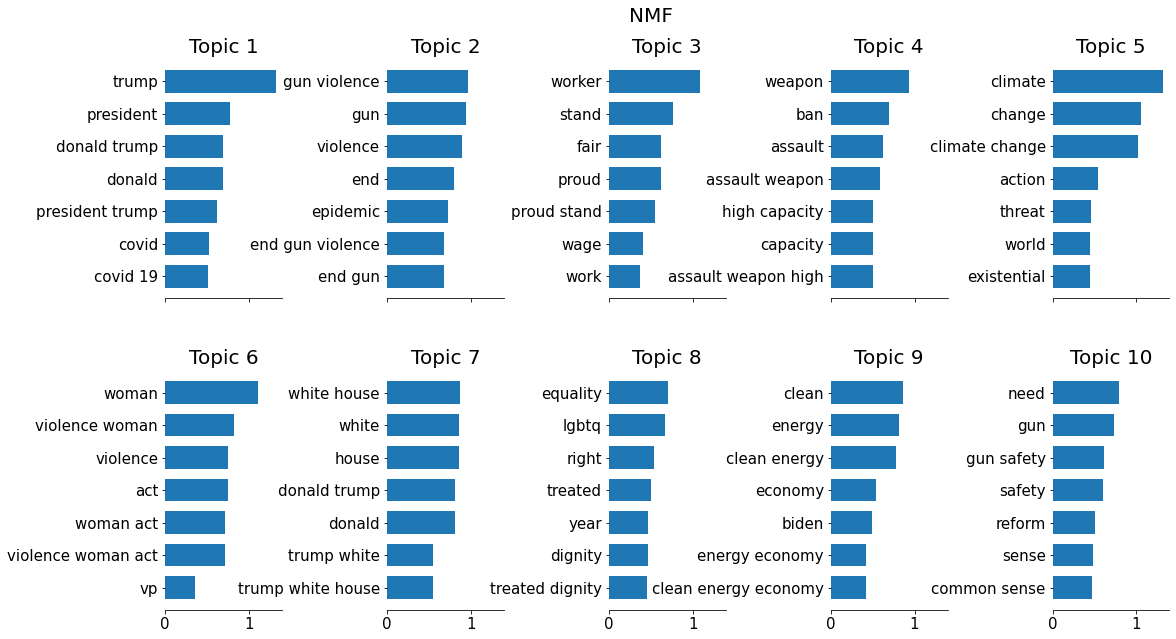

In [17]:
plot_top_words(nmf, feature_names, 7, "NMF")

# Topic Modeling with BERTopic

In [18]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df['tweet_clean'])

/usr/local/lib/python3.7/dist-packages/numba/core/types/__init__.py:108: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  long_ = _make_signed(np.long)
/usr/local/lib/python3.7/dist-packages/numba/core/types/__init__.py:109: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need t

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2022-03-01 15:23:19,885 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(

In [19]:
freq = topic_model.get_topic_info()
freq.head(15)

,Topic,Count,Name
0,0,188,0_climate_change_action_trump
1,1,175,1_gun_nra_violence_epidemic
2,2,103,2_lgbtq_equality_right_treated
3,3,76,3_woman_violence_sexual_vawa
4,4,71,4_trump_donald_covid19_president
5,5,63,5_worker_stand_fair_union
6,6,63,6_child_trumps_policy_immigration
7,7,60,7_small_business_relief_corporation


In [20]:
topic_model.get_topic(0) 

[('climate', 0.11841903238473776),
 ('change', 0.08026095209901085),
 ('action', 0.051501601913160056),
 ('trump', 0.04734784480008547),
 ('president', 0.046495140862528664),
 ('threat', 0.041280804572837976),
 ('planet', 0.040242252031009874),
 ('world', 0.03957532302792855),
 ('crisis', 0.03937999849302652),
 ('clean', 0.03931138671599482)]

In [21]:
topic_model.get_representative_docs(0)

['climate emergency just threat environment, threat health, economy, more. donald trump white house action combat late. …',
 'imagine progress make years. make health care right, lead climate change, assault weapon schools. reality — first, beat donald',
 'clean energy economy future present enormous opportunity. president biden create 10 million well-paying job united state grow stronger, inclusive middle class community country. #climatetownhall']

In [22]:
topic_model.visualize_topics()

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/usr/local/lib/python3.7/dist-packages/numba/core/ir_util

In [23]:
topic_model.visualize_hierarchy(top_n_topics=25)

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [24]:
topic_model.visualize_barchart(top_n_topics=25)